<a href="https://colab.research.google.com/github/rusetskiy1974/Data-Sciens/blob/main/HW7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:

import pandas as pd
import numpy as np
from surprise.model_selection import cross_validate
from surprise import Dataset, Reader, SVD, accuracy
from surprise.model_selection import train_test_split

data = Dataset.load_builtin('ml-100k')



Dataset ml-100k could not be found. Do you want to download it? [Y/n] Trying to download dataset from https://files.grouplens.org/datasets/movielens/ml-100k.zip...
Done! Dataset ml-100k has been saved to C:\Users\user/.surprise_data/ml-100k


In [3]:
raw_ratings = data.raw_ratings
print("Number of ratings:", len(raw_ratings))

Number of ratings: 100000


Аналіз  наших даних




In [4]:
from datetime import date
dater = None

In [8]:
print("\nTop 10 samples of raw ratings:")
for rating in raw_ratings[:10]:
  uid, iid, ur, timestamp = rating
  print(f"UserID: {uid:5}, ItemID: {iid:5}, UserRateForItem: {ur:5}, timestamp: {timestamp}")


Top 10 samples of raw ratings:
UserID: 196  , ItemID: 242  , UserRateForItem:   3.0, timestamp: 881250949
UserID: 186  , ItemID: 302  , UserRateForItem:   3.0, timestamp: 891717742
UserID: 22   , ItemID: 377  , UserRateForItem:   1.0, timestamp: 878887116
UserID: 244  , ItemID: 51   , UserRateForItem:   2.0, timestamp: 880606923
UserID: 166  , ItemID: 346  , UserRateForItem:   1.0, timestamp: 886397596
UserID: 298  , ItemID: 474  , UserRateForItem:   4.0, timestamp: 884182806
UserID: 115  , ItemID: 265  , UserRateForItem:   2.0, timestamp: 881171488
UserID: 253  , ItemID: 465  , UserRateForItem:   5.0, timestamp: 891628467
UserID: 305  , ItemID: 451  , UserRateForItem:   3.0, timestamp: 886324817
UserID: 6    , ItemID: 86   , UserRateForItem:   3.0, timestamp: 883603013


In [5]:
search_uid = '233'
count = 10
print(f"\nTop {count} ratings of user: {search_uid}")

for rating in raw_ratings:
  uid, iid, ur, timestamp = rating
  if uid == search_uid:
    count -= 1
    print(f"UserID: {uid:5}, ItemID: {iid:5}, UserRateForItem: {ur:5}, timestamp: {timestamp}")
    if count <= 0:
      break


Top 10 ratings of user: 233
UserID: 233  , ItemID: 202  , UserRateForItem:   5.0, timestamp: 879394264
UserID: 233  , ItemID: 375  , UserRateForItem:   4.0, timestamp: 876374419
UserID: 233  , ItemID: 177  , UserRateForItem:   4.0, timestamp: 877661496
UserID: 233  , ItemID: 208  , UserRateForItem:   4.0, timestamp: 880610814
UserID: 233  , ItemID: 99   , UserRateForItem:   3.0, timestamp: 877663383
UserID: 233  , ItemID: 482  , UserRateForItem:   4.0, timestamp: 877661437
UserID: 233  , ItemID: 806  , UserRateForItem:   4.0, timestamp: 880610396
UserID: 233  , ItemID: 357  , UserRateForItem:   5.0, timestamp: 877661553
UserID: 233  , ItemID: 958  , UserRateForItem:   5.0, timestamp: 875508372
UserID: 233  , ItemID: 48   , UserRateForItem:   5.0, timestamp: 877663184


In [6]:
search_iid = '100'
count = 10
print(f"\nTop {count} ratings of item: {search_iid}")

for rating in raw_ratings:
  uid, iid, ur, timestamp = rating
  if iid == search_iid:
    count -= 1
    print(f"UserID: {uid:5}, ItemID: {iid:5}, UserRateForItem: {ur:5}, timestamp: {timestamp}")
    if count <= 0:
      break


Top 10 ratings of item: 100
UserID: 251  , ItemID: 100  , UserRateForItem:   4.0, timestamp: 886271884
UserID: 10   , ItemID: 100  , UserRateForItem:   5.0, timestamp: 877891747
UserID: 108  , ItemID: 100  , UserRateForItem:   4.0, timestamp: 879879720
UserID: 63   , ItemID: 100  , UserRateForItem:   5.0, timestamp: 875747319
UserID: 312  , ItemID: 100  , UserRateForItem:   4.0, timestamp: 891698613
UserID: 65   , ItemID: 100  , UserRateForItem:   3.0, timestamp: 879217558
UserID: 79   , ItemID: 100  , UserRateForItem:   5.0, timestamp: 891271652
UserID: 58   , ItemID: 100  , UserRateForItem:   5.0, timestamp: 884304553
UserID: 198  , ItemID: 100  , UserRateForItem:   1.0, timestamp: 884207325
UserID: 184  , ItemID: 100  , UserRateForItem:   5.0, timestamp: 889907652


In [7]:
type(data)


surprise.dataset.DatasetAutoFolds

# Створюємо функції для навчання та оцінки моделі

In [12]:

def data_full_trainset(algo, data, uid, iid, ur):
    algorithm_name = algo.__class__.__name__
    print(f"Algo: {algorithm_name}, UserID: {uid:5}, ItemID: {iid:5}, UserRateForItem: {ur:5}")

    trainset = data.build_full_trainset()

    print("Number of train ratings:", len(list(trainset.all_ratings())))

    algo.fit(trainset)

    pred = algo.predict(uid, iid, r_ui=ur, verbose=True)

    testset = trainset.build_testset()
    print("Number of test ratings:", len(testset))

    predictions = algo.test(testset)
    rmse = accuracy.rmse(predictions, verbose=True) 

    return pred, rmse



In [13]:

def data_train_test_split(algo, data, uid, iid, ur, test_size=0.25):
    algorithm_name = algo.__class__.__name__
    print(f"Algo: {algorithm_name}, UserID: {uid:5}, ItemID: {iid:5}, UserRateForItem: {ur:5}")

    trainset, testset = train_test_split(data, test_size=test_size)

    print("Number of train ratings:", len(list(trainset.all_ratings())))
    algo.fit(trainset)

    pred = algo.predict(uid, iid, r_ui=ur, verbose=True)

    print("Number of test ratings:", len(testset))

    predictions = algo.test(testset)

    rmse = accuracy.rmse(predictions, verbose=True)  
    return {algorithm_name: rmse}


# Algorithm SVD.

Алгоритм SVD (сингулярне розкладання матриць) є одним з популярних методів матричної факторизації, що використовується в рекомендаційних системах для передбачення рейтингів, які користувачі можуть поставити тим чи іншим предметам (наприклад, фільмам). У бібліотеці Surprise алгоритм SVD реалізований як клас, який можна використовувати для створення моделей рекомендаційних систем.

Матрична факторизація:

    Основна ідея SVD полягає у факторизації матриці користувач-елемент (рейтингів) на дві нижчого рангу матриці:
        Матриця користувачів (P), де рядки представляють користувачів, а стовпці — приховані фактори.
        Матриця елементів (Q), де рядки представляють елементи, а стовпці — приховані фактори.
    Передбачений рейтинг користувача для конкретного елемента обчислюється як скалярний добуток відповідних векторів із матриць P та Q.

Метод SVD може бути адаптований до наборів даних з неявним зворотним зв'язком (implicit feedback).

In [17]:
SEED = 42
algo_cv = {}
algo_split = {}
algo = SVD(random_state=SEED)
uid = '233'
iid = '99'
ur = 3

In [18]:

data_full_trainset(algo, data, uid, iid, ur)

Algo: SVD, UserID: 233  , ItemID: 99   , UserRateForItem:     3
Number of train ratings: 100000
user: 233        item: 99         r_ui = 3.00   est = 4.05   {'was_impossible': False}
Number of test ratings: 100000
RMSE: 0.6752


(Prediction(uid='233', iid='99', r_ui=3, est=4.053060270524703, details={'was_impossible': False}),
 0.6751519444923186)

Отримали низький показник RMSE 0.675, оскільки ми є упередженими

Тренування і тестування з розподілом нашого датасету

In [23]:
algo_split.update(data_train_test_split(algo, data, uid, iid, ur))

Algo: SVD, UserID: 233  , ItemID: 99   , UserRateForItem:     3
Number of train ratings: 75000
user: 233        item: 99         r_ui = 3.00   est = 4.18   {'was_impossible': False}
Number of test ratings: 25000
RMSE: 0.9444


In [26]:

cv = 5

import numpy as np

def data_cross_validate(algo, data, cv=5):
  algorithm_name = algo.__class__.__name__
  print(f"Algo: {algorithm_name}. Cross Validate: {cv}")
  cv_result = cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=cv, verbose=True)
  mean_rmse = np.array(cv_result.get('test_rmse')).mean()
  mean_fit = np.array(cv_result.get('fit_time')).mean()
  mean_test = np.array(cv_result.get('test_time')).mean()

  print(f"{mean_rmse=}")
  return {algorithm_name: (mean_rmse, mean_fit, mean_test)}


In [27]:
algo_cv.update(data_cross_validate(algo, data))

Algo: SVD. Cross Validate: 5
Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9330  0.9339  0.9414  0.9330  0.9418  0.9366  0.0041  
MAE (testset)     0.7362  0.7357  0.7411  0.7363  0.7420  0.7383  0.0027  
Fit time          1.84    1.73    1.79    2.15    1.95    1.89    0.15    
Test time         0.28    0.16    0.23    0.12    0.17    0.19    0.05    
mean_rmse=0.9365949819386096


ереднє значення RMSE 0.9365,  похибка між передбаченими та реальними рейтингами становить приблизно 0.94. 

# Algorithm SVD++ (SVDpp)

In [28]:
from surprise import SVDpp
algo = SVDpp(cache_ratings=True ,random_state=SEED)

In [29]:
data_full_trainset(algo, data, uid, iid, ur)

Algo: SVDpp, UserID: 233  , ItemID: 99   , UserRateForItem:     3
Number of train ratings: 100000
user: 233        item: 99         r_ui = 3.00   est = 4.10   {'was_impossible': False}
Number of test ratings: 100000
RMSE: 0.7574


(Prediction(uid='233', iid='99', r_ui=3, est=4.098912571915785, details={'was_impossible': False}),
 0.7574410731286016)

In [30]:
algo_split.update(data_train_test_split(algo, data, uid, iid, ur))

Algo: SVDpp, UserID: 233  , ItemID: 99   , UserRateForItem:     3
Number of train ratings: 75000
user: 233        item: 99         r_ui = 3.00   est = 4.14   {'was_impossible': False}
Number of test ratings: 25000
RMSE: 0.9223


In [31]:
algo_cv.update(data_cross_validate(algo, data))

Algo: SVDpp. Cross Validate: 5
Evaluating RMSE, MAE of algorithm SVDpp on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9206  0.9195  0.9202  0.9209  0.9146  0.9192  0.0023  
MAE (testset)     0.7214  0.7223  0.7224  0.7219  0.7192  0.7214  0.0012  
Fit time          22.96   22.82   23.25   22.25   22.78   22.81   0.32    
Test time         5.24    5.66    6.03    5.51    5.17    5.52    0.31    
mean_rmse=0.9191602114416508


# Algorithm NMF

In [32]:
from surprise import NMF

In [33]:
algo = NMF()

In [38]:
data_full_trainset(algo, data, uid, iid, ur)

Algo: NMF, UserID: 233  , ItemID: 99   , UserRateForItem:     3
Number of train ratings: 100000
user: 233        item: 99         r_ui = 3.00   est = 3.93   {'was_impossible': False}
Number of test ratings: 100000
RMSE: 0.8169


(Prediction(uid='233', iid='99', r_ui=3, est=3.9344559976466877, details={'was_impossible': False}),
 0.8168751813259801)

In [39]:
algo_split.update(data_train_test_split(algo, data, uid, iid, ur))

Algo: NMF, UserID: 233  , ItemID: 99   , UserRateForItem:     3
Number of train ratings: 75000
user: 233        item: 99         r_ui = 3.00   est = 4.17   {'was_impossible': False}
Number of test ratings: 25000
RMSE: 0.9675


In [40]:
algo_cv.update(data_cross_validate(algo, data))

Algo: NMF. Cross Validate: 5
Evaluating RMSE, MAE of algorithm NMF on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9662  0.9669  0.9641  0.9667  0.9575  0.9643  0.0035  
MAE (testset)     0.7600  0.7596  0.7559  0.7589  0.7543  0.7577  0.0022  
Fit time          2.59    2.78    3.29    2.87    2.97    2.90    0.23    
Test time         0.15    0.10    0.12    0.33    0.14    0.17    0.08    
mean_rmse=0.9642861842335886


In [48]:
print(algo_split)
print(algo_cv)

{'SVD': 0.9443544252872612, 'SVDpp': 0.9222999764610824, 'NMF': 0.9675298654883839}
{'SVD': (0.9365949819386096, 1.8897473335266113, 0.19034333229064943), 'SVDpp': (0.9191602114416508, 22.811521148681642, 5.52066330909729), 'NMF': (0.9642861842335886, 2.901377248764038, 0.16717829704284667)}


# Візуалізація роботи моделей

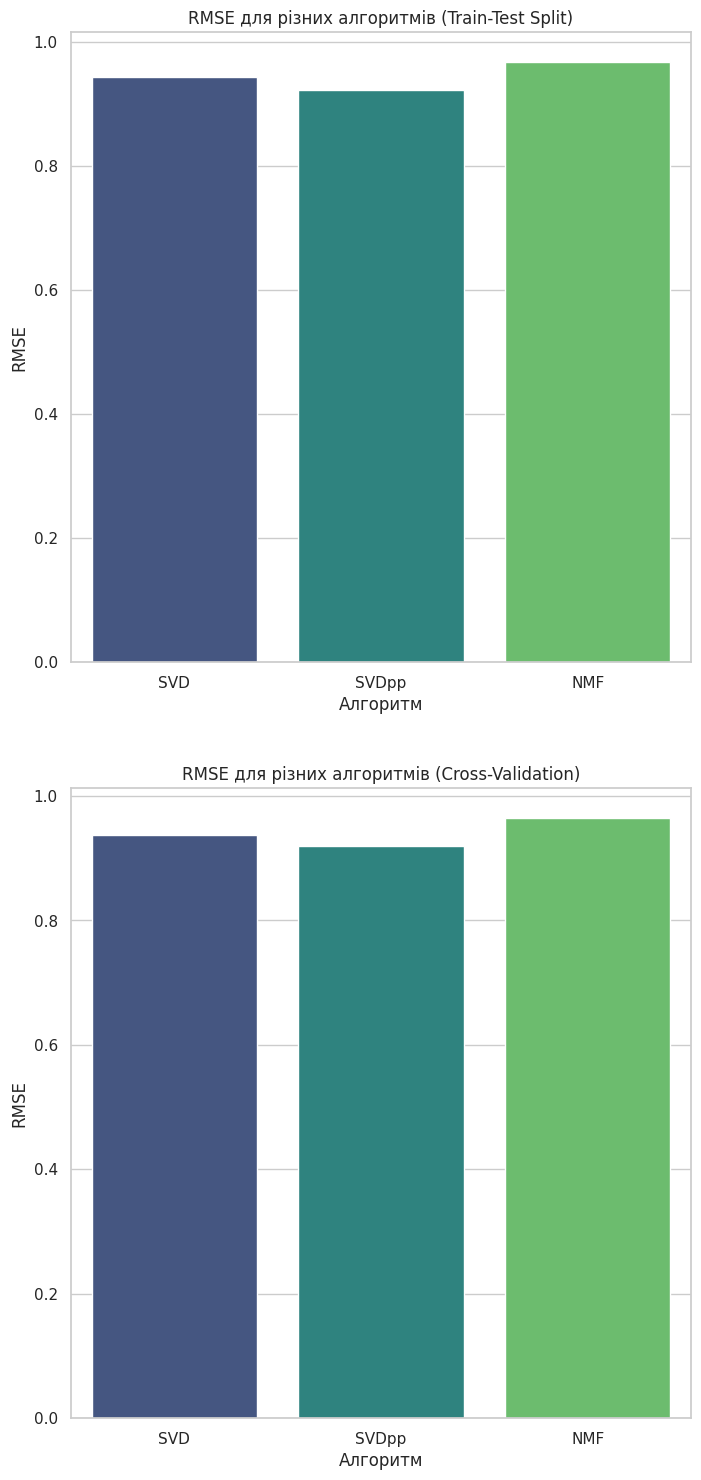

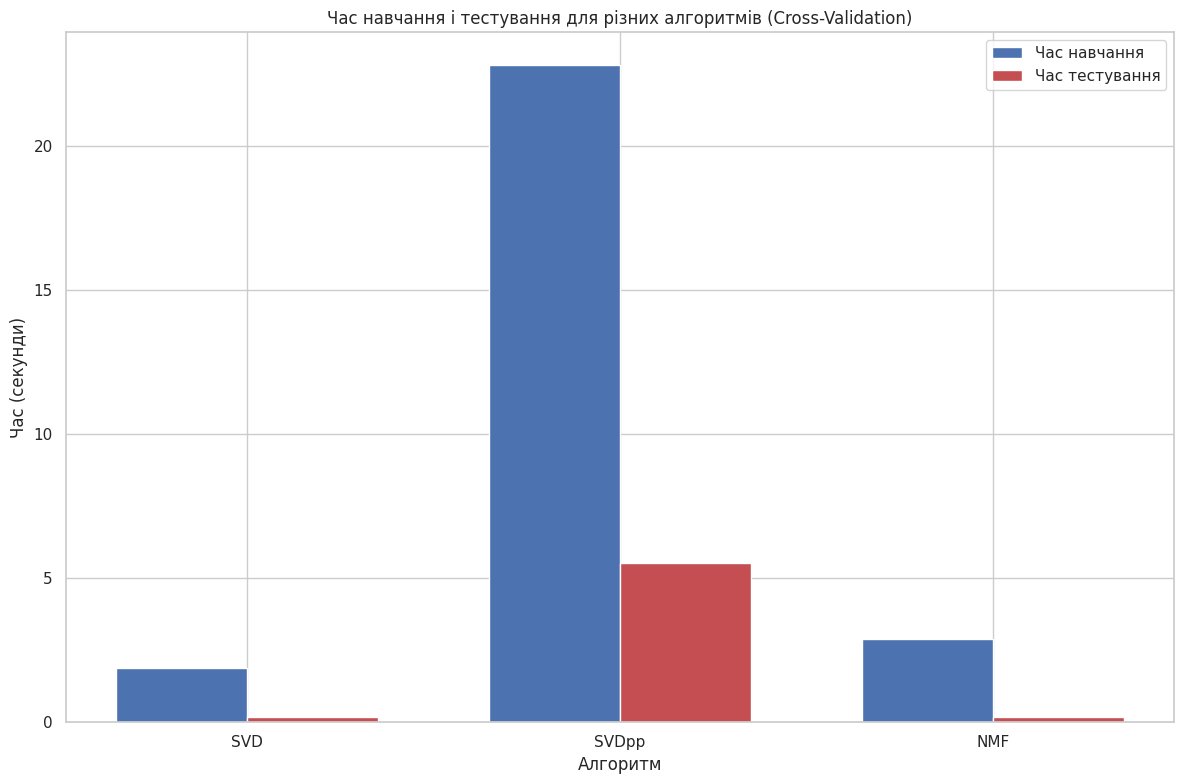

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

model_names = list(algo_split.keys())
rmse_values_split = [algo_split[name] for name in model_names]

model_names_cv = list(algo_cv.keys())
rmse_values_cv = [algo_cv[name][0] for name in model_names_cv]
fit_times_cv = [algo_cv[name][1] for name in model_names_cv]
test_times_cv = [algo_cv[name][2] for name in model_names_cv]

sns.set(style="whitegrid")

fig, axes = plt.subplots(2, 1, figsize=(8, 18))

sns.barplot(x=model_names, y=rmse_values_split, ax=axes[0], palette="viridis", hue=model_names, legend=False)
axes[0].set_title('RMSE для різних алгоритмів (Train-Test Split)')
axes[0].set_xlabel('Алгоритм')
axes[0].set_ylabel('RMSE')

sns.barplot(x=model_names_cv, y=rmse_values_cv, ax=axes[1], palette="viridis", hue=model_names_cv, legend=False)
axes[1].set_title('RMSE для різних алгоритмів (Cross-Validation)')
axes[1].set_xlabel('Алгоритм')
axes[1].set_ylabel('RMSE')

width = 0.35 
x = np.arange(len(model_names_cv)) 

fig, ax = plt.subplots(figsize=(12, 8))
rects1 = ax.bar(x - width/2, fit_times_cv, width, label='Час навчання', color='b')
rects2 = ax.bar(x + width/2, test_times_cv, width, label='Час тестування', color='r')

ax.set_xlabel('Алгоритм')
ax.set_ylabel('Час (секунди)')
ax.set_title('Час навчання і тестування для різних алгоритмів (Cross-Validation)')
ax.set_xticks(x)
ax.set_xticklabels(model_names_cv)
ax.legend()

plt.tight_layout()
plt.show()



In [50]:
best_algo = SVD

Пошук оптимальних параметрів використовуючи GridSearchCV для SVD

In [51]:
from surprise.model_selection import GridSearchCV

In [52]:
param_grid = {"random_state": [SEED],
              "n_epochs": [10, 15, 20], "lr_all": [0.005, 0.007, 0.01], "reg_all": [0.01, 0.02, 0.03]
              }

In [53]:
gs = GridSearchCV(best_algo, param_grid, measures=["rmse"], cv=5, n_jobs=-1)

In [54]:
%time gs.fit(data)

CPU times: user 26.4 s, sys: 3.46 s, total: 29.9 s
Wall time: 2min 40s


In [55]:
# best RMSE score
print(gs.best_score["rmse"])

0.9312997326981618


In [56]:
best_params = gs.best_params["rmse"]
print(f"{best_params=}")

best_params={'random_state': 42, 'n_epochs': 20, 'lr_all': 0.007, 'reg_all': 0.03}


Звіт роботи GridSearchCV для всіх комбінацій параметрів

In [57]:
results_df = pd.DataFrame.from_dict(gs.cv_results)
results_df.head(10)

,split0_test_rmse,split1_test_rmse,split2_test_rmse,split3_test_rmse,split4_test_rmse,mean_test_rmse,std_test_rmse,rank_test_rmse,mean_fit_time,std_fit_time,mean_test_time,std_test_time,params,param_random_state,param_n_epochs,param_lr_all,param_reg_all
0,0.951671,0.947887,0.949788,0.950174,0.947323,0.949369,0.001581,23,1.090543,0.048700,0.330975,0.061549,"{'random_state': 42, 'n_epochs': 10, 'lr_all':...",42,10,0.005,0.01
1,0.950530,0.947004,0.948682,0.948870,0.946290,0.948275,0.001494,22,1.487839,0.275137,0.398900,0.135186,"{'random_state': 42, 'n_epochs': 10, 'lr_all':...",42,10,0.005,0.02
2,0.949809,0.946499,0.947983,0.947996,0.945662,0.947590,0.001425,21,1.021461,0.041096,0.274854,0.043842,"{'random_state': 42, 'n_epochs': 10, 'lr_all':...",42,10,0.005,0.03
3,0.946441,0.942834,0.945144,0.946541,0.942780,0.944748,0.001660,20,0.985750,0.043299,0.271798,0.027062,"{'random_state': 42, 'n_epochs': 10, 'lr_all':...",42,10,0.007,0.01
4,0.944371,0.941217,0.943217,0.944215,0.940890,0.942782,0.001469,16,1.438109,0.333994,0.453097,0.099225,"{'random_state': 42, 'n_epochs': 10, 'lr_all':...",42,10,0.007,0.02
5,0.943335,0.940551,0.942316,0.942944,0.940001,0.941829,0.001321,13,1.189144,0.297892,0.315020,0.061713,"{'random_state': 42, 'n_epochs': 10, 'lr_all':...",42,10,0.007,0.03
6,0.944461,0.940029,0.942344,0.945767,0.940738,0.942668,0.002173,15,1.159345,0.096656,0.302131,0.030128,"{'random_state': 42, 'n_epochs': 10, 'lr_all':...",42,10,0.010,0.01
7,0.938244,0.934541,0.936653,0.939288,0.934977,0.936741,0.001828,6,1.640540,0.433891,0.441492,0.132437,"{'random_state': 42, 'n_epochs': 10, 'lr_all':...",42,10,0.010,0.02
8,0.934973,0.931961,0.933833,0.935773,0.932072,0.933722,0.001523,4,1.265455,0.234208,0.277945,0.029246,"{'random_state': 42, 'n_epochs': 10, 'lr_all':...",42,10,0.010,0.03
9,0.945875,0.941944,0.944551,0.946143,0.941973,0.944097,0.001828,19,1.529474,0.036215,0.239402,0.002941,"{'random_state': 42, 'n_epochs': 15, 'lr_all':...",42,15,0.005,0.01


In [58]:
algo = gs.best_estimator["rmse"]

Найкращі рекомендації для користувачів (SVDpp):

In [59]:
from collections import defaultdict

def get_top_n(predictions, n=10):

    top_n = defaultdict(list)

    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]  

    return top_n 


In [60]:
trainset = data.build_full_trainset()

In [61]:
print(algo.__class__.__name__, "params:", best_params)

SVD params: {'random_state': 42, 'n_epochs': 20, 'lr_all': 0.007, 'reg_all': 0.03}


In [62]:
%time algo.fit(trainset)

CPU times: user 2.56 s, sys: 8.66 ms, total: 2.57 s
Wall time: 2.62 s


In [63]:
testset = trainset.build_anti_testset()
%time predictions = algo.test(testset)

CPU times: user 11.7 s, sys: 1.23 s, total: 13 s
Wall time: 12.9 s


In [65]:
num_recomendations = 5
top_n = get_top_n(predictions, n=num_recomendations)

In [66]:
counter=10
print(f"Найкращі рекомендації для перших {counter} користувачів:\n")

for uid, user_ratings in top_n.items():
    recomend = [f"{iid:6}: est - ({est:.2f})" for (iid, est) in user_ratings]
    print(f"Для користувача: {uid:2}, найкращі {num_recomendations} рекомендацій: {recomend}")
    counter -= 1
    if counter <= 0:
      break

Найкращі рекомендації для перших 10 користувачів:

Для користувача: 196, найкращі 5 рекомендацій: ['1449  : est - (4.75)', '318   : est - (4.69)', '427   : est - (4.57)', '98    : est - (4.56)', '357   : est - (4.55)']
Для користувача: 186, найкращі 5 рекомендацій: ['318   : est - (4.83)', '515   : est - (4.68)', '357   : est - (4.64)', '83    : est - (4.59)', '1194  : est - (4.52)']
Для користувача: 22, найкращі 5 рекомендацій: ['302   : est - (5.00)', '100   : est - (5.00)', '64    : est - (5.00)', '316   : est - (4.83)', '12    : est - (4.79)']
Для користувача: 244, найкращі 5 рекомендацій: ['137   : est - (5.00)', '134   : est - (4.93)', '427   : est - (4.92)', '192   : est - (4.91)', '14    : est - (4.88)']
Для користувача: 166, найкращі 5 рекомендацій: ['173   : est - (4.80)', '172   : est - (4.70)', '22    : est - (4.70)', '611   : est - (4.69)', '641   : est - (4.67)']
Для користувача: 298, найкращі 5 рекомендацій: ['313   : est - (4.90)', '64    : est - (4.86)', '272   : est -